In [97]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [98]:
import zipfile

In [99]:


zip_file = "data.zip"
 
try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
        print("Extracted all")
except:
    print("Invalid file")

Extracted all


In [100]:
 
train_path = r"D:\5th Semester (Kasam se aaag lgani hai)\AI-341\AI-341 Project\deep learning dataset\Train"
test_path = r"D:\5th Semester (Kasam se aaag lgani hai)\AI-341\AI-341 Project\deep learning dataset/"
height = 50
width = 50

# Declaring labels for each sample 

In [101]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [102]:
batch_size = 150
seed = 42

# Scaling and Preprocessing the Image Data

In [103]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


# Plotting the Images along with Labels

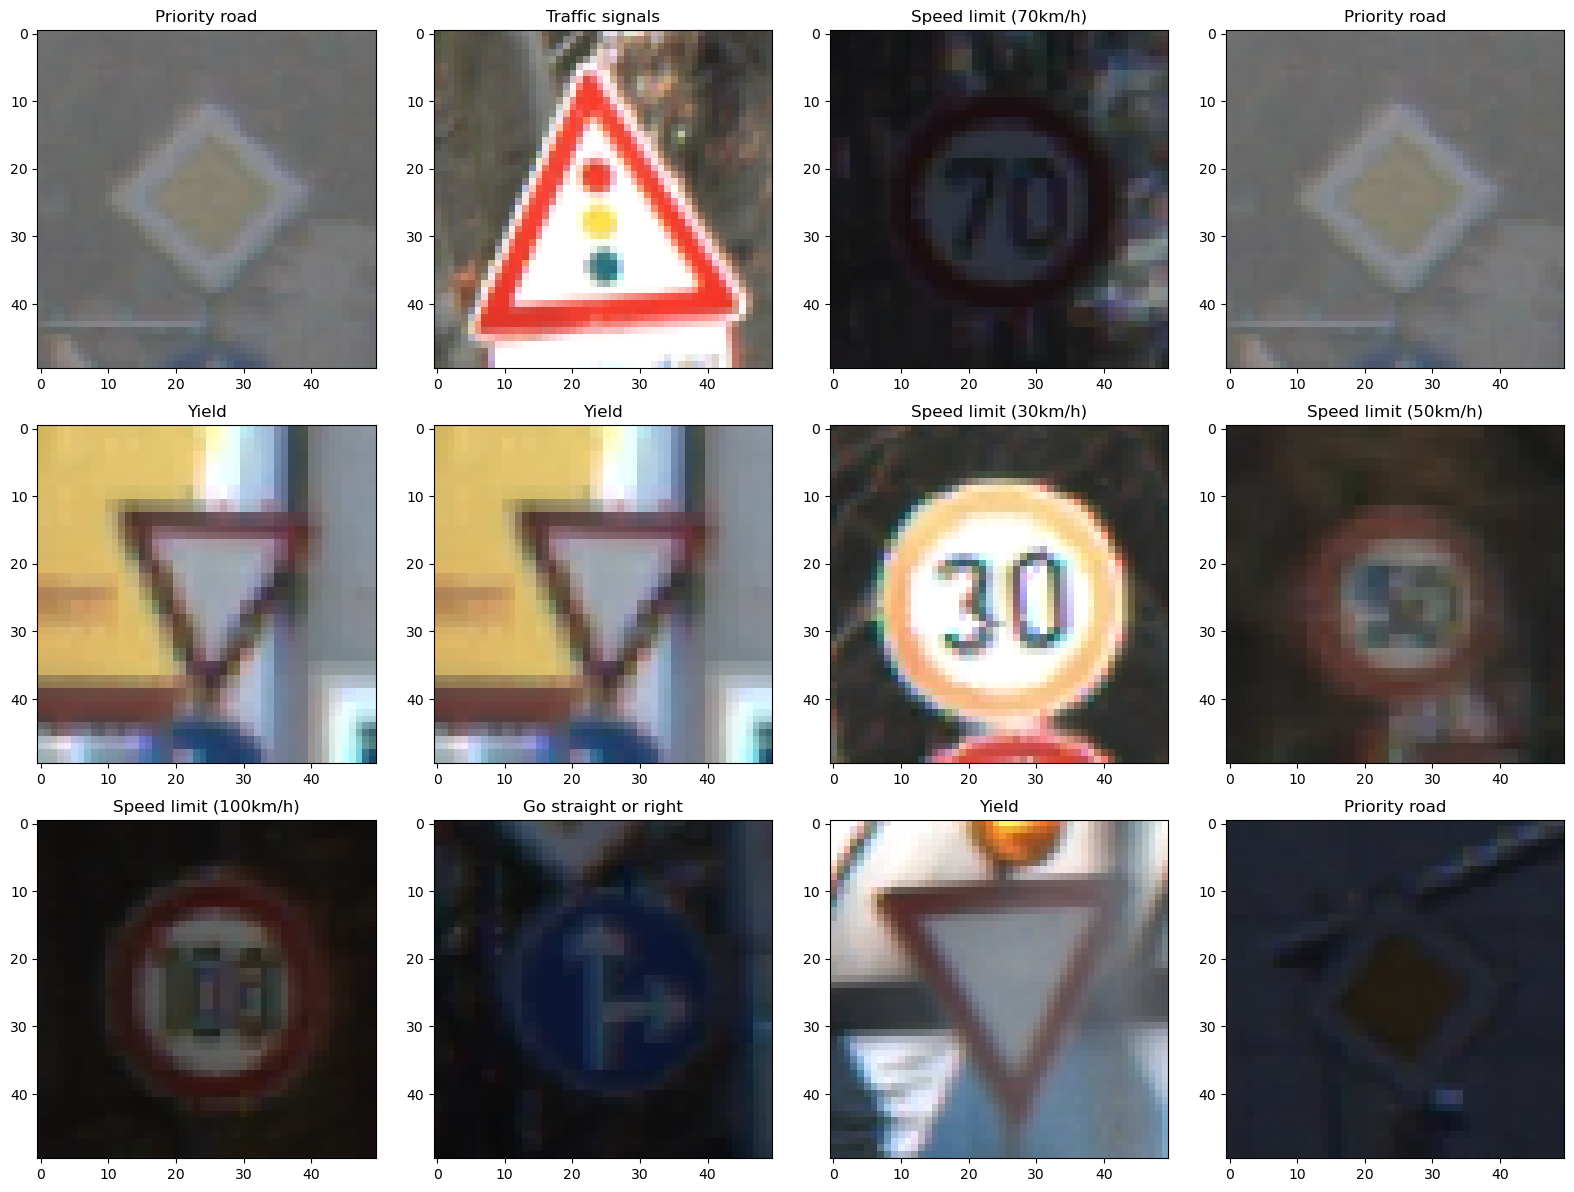

In [104]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

# Training the Convolutional Neural Network

In [105]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(43, activation='softmax')
])

In [106]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 16)        1216      
                                                                 
 conv2d_9 (Conv2D)           (None, 42, 42, 32)        12832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 21, 21, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 19, 19, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 17, 17, 64)       

In [108]:
alpha=0.01
epochs=5
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [109]:
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset))

Epoch 1/5
210/210 [==============================] - 130s 614ms/step - loss: 0.4841 - accuracy: 0.8752 - val_loss: 0.3813 - val_accuracy: 0.9042
Epoch 2/5
210/210 [==============================] - 109s 520ms/step - loss: 0.0664 - accuracy: 0.9806 - val_loss: 0.5806 - val_accuracy: 0.8556
Epoch 3/5
210/210 [==============================] - 110s 524ms/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 0.4370 - val_accuracy: 0.9121
Epoch 4/5
210/210 [==============================] - 111s 529ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.3399 - val_accuracy: 0.9251
Epoch 5/5
210/210 [==============================] - 113s 538ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.3015 - val_accuracy: 0.9397


# Plotting the Accuracy and Loss of train and test data

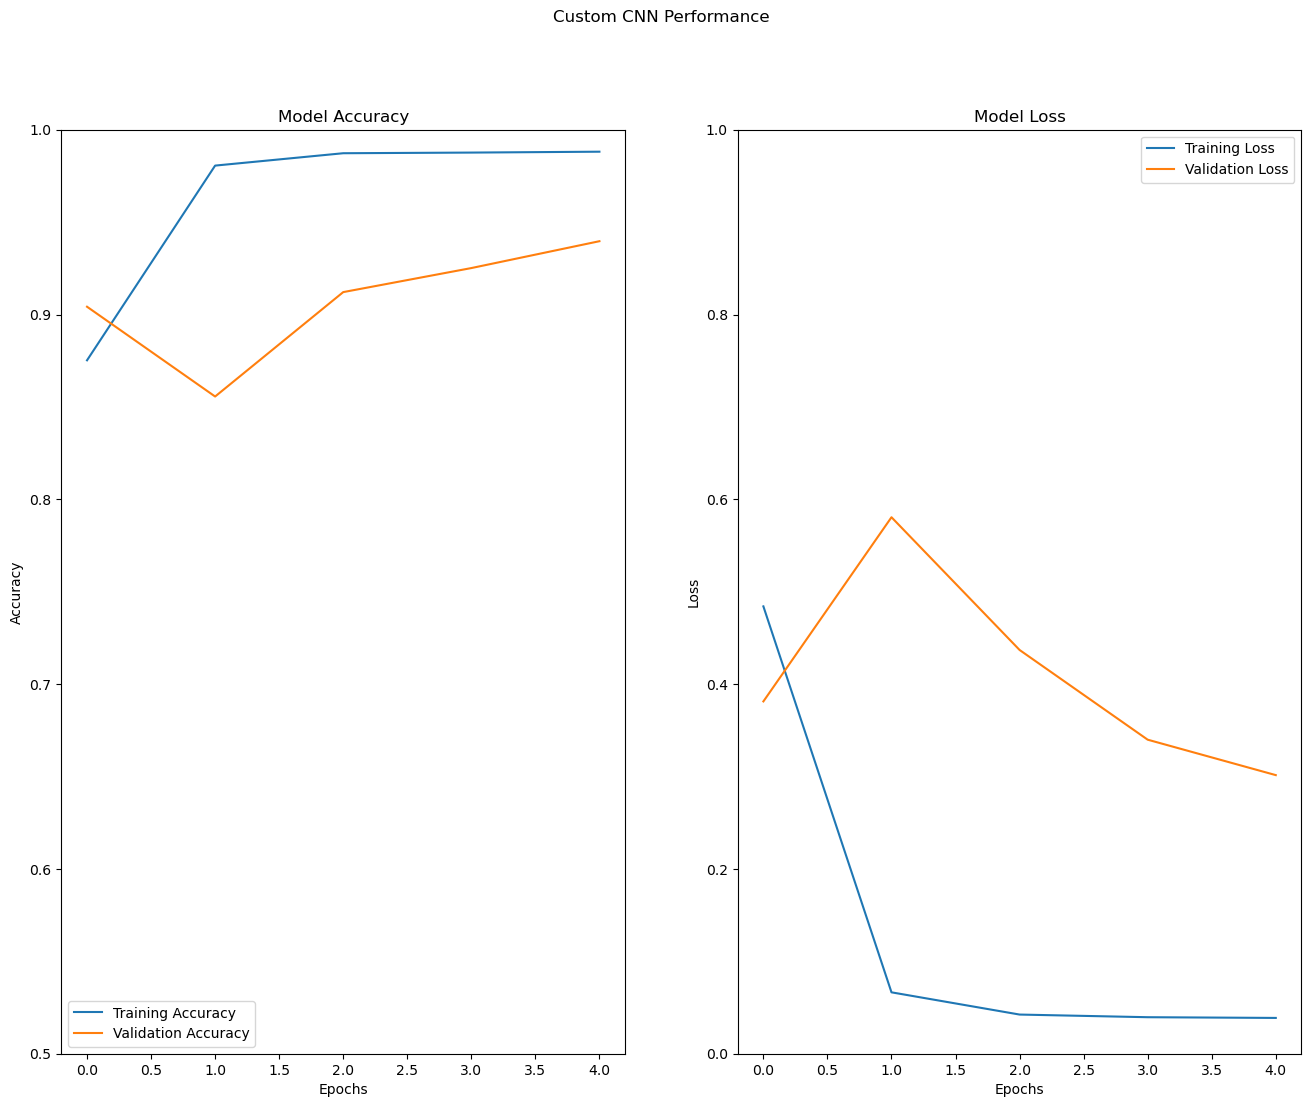

<Figure size 1000x700 with 0 Axes>

In [110]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [111]:
model.save("CNN.h5")

In [112]:
test_path = r"D:\5th Semester (Kasam se aaag lgani hai)\AI-341\AI-341 Project\deep learning dataset/"

# Preparing the Test Data

In [113]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
test_df = pd.read_csv('Test.csv')

test_labels = test_df["ClassId"].values
imgs = test_df["Path"].values
data =[]

for img in imgs:
    try:
        image = cv2.imread(test_path +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

# Predicting values for the Test Data

In [114]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 7s 17ms/step
Test Data accuracy:  78.701504354711


5/5 [==============================] - 0s 18ms/step


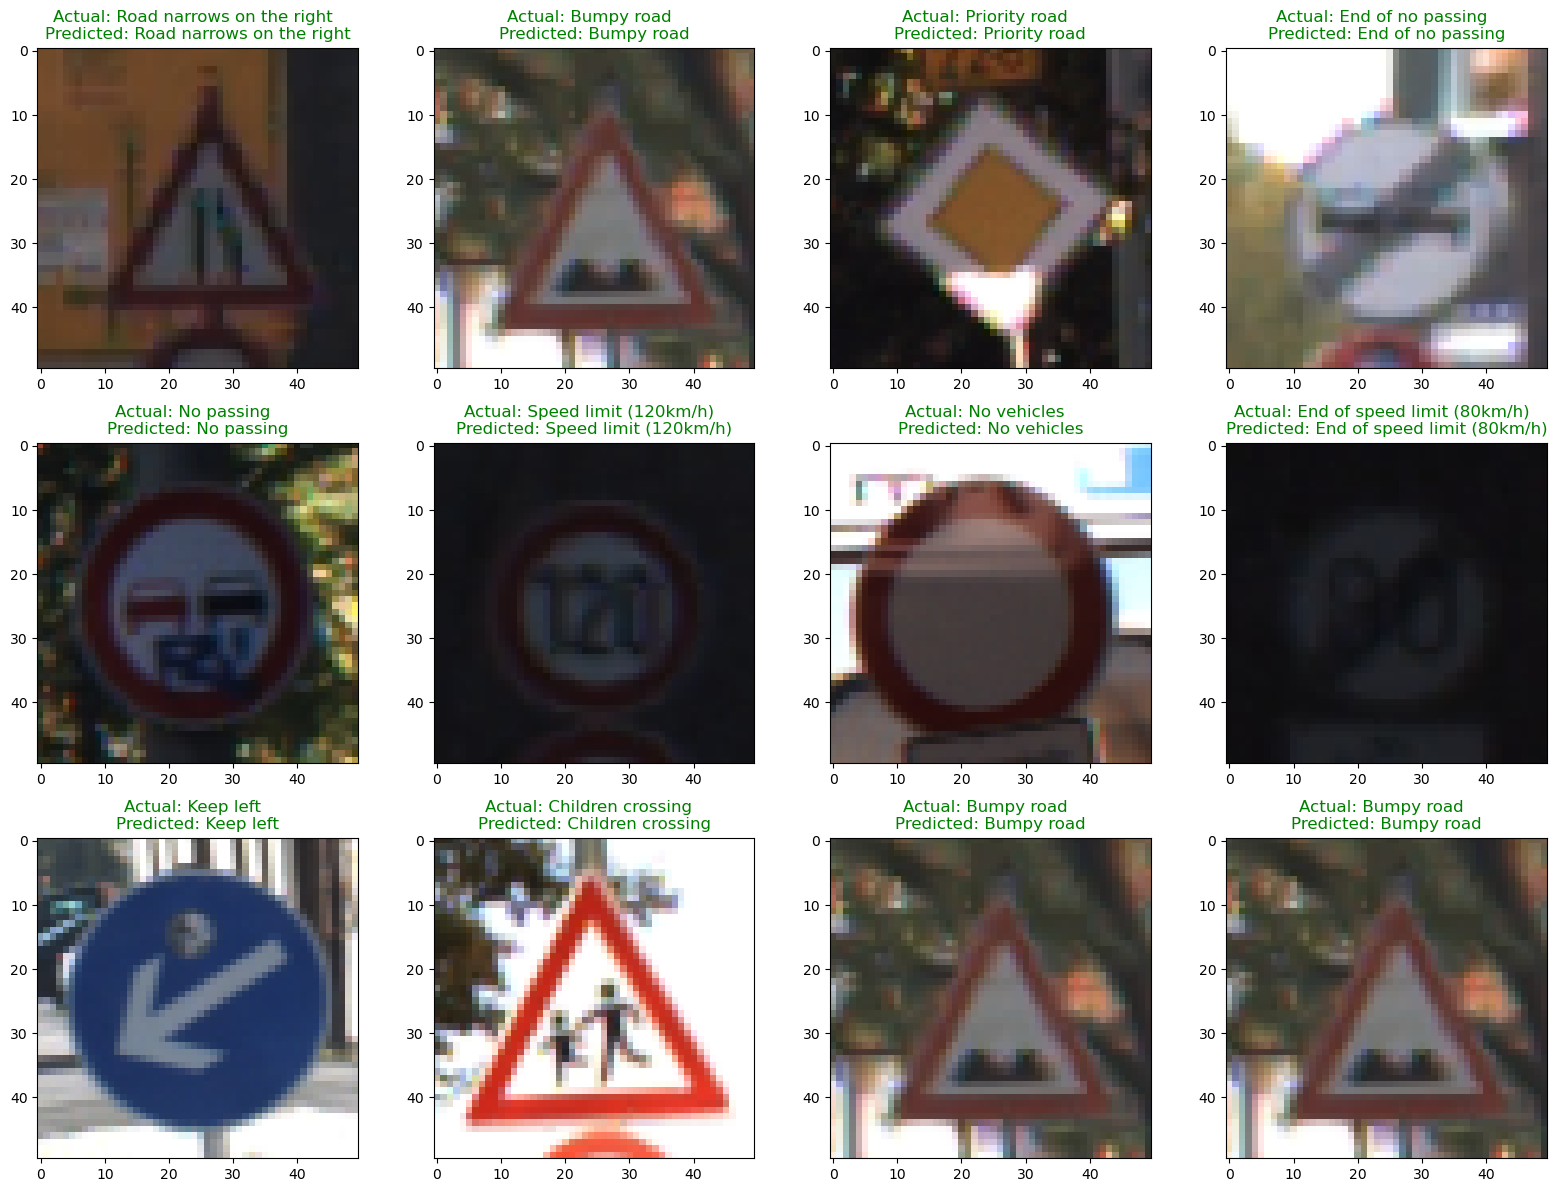

In [115]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else: 
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()

# Comparing Actual and Predicted Values for the Test data

In [118]:
true_count=0
false_count=0

In [119]:
for i in range(0,len(pred)):
    print(i+1 ," : Actual Value ",classes[test_labels[i]])
    print("Predicted Value ",classes[pred[i]])
    if classes[test_labels[i]]==classes[pred[i]]:
        true_count += 1
        print("True Prediction \n")
    else:
        false_count+= 1
        print("Wrong Prediction \n")

1  : Actual Value  Veh > 3.5 tons prohibited
Predicted Value  Veh > 3.5 tons prohibited
True Prediction 

2  : Actual Value  Speed limit (30km/h)
Predicted Value  Speed limit (30km/h)
True Prediction 

3  : Actual Value  Keep right
Predicted Value  Keep right
True Prediction 

4  : Actual Value  Turn right ahead
Predicted Value  Turn right ahead
True Prediction 

5  : Actual Value  Right-of-way at intersection
Predicted Value  Right-of-way at intersection
True Prediction 

6  : Actual Value  Keep right
Predicted Value  Keep right
True Prediction 

7  : Actual Value  General caution
Predicted Value  General caution
True Prediction 

8  : Actual Value  Priority road
Predicted Value  Priority road
True Prediction 

9  : Actual Value  Road work
Predicted Value  Road work
True Prediction 

10  : Actual Value  Ahead only
Predicted Value  Yield
Wrong Prediction 

11  : Actual Value  Priority road
Predicted Value  General caution
Wrong Prediction 

12  : Actual Value  Speed limit (100km/h)
Pre

Number of Wrong Predictions

In [124]:
false_count

2690

In [125]:
true_count

9940

In [126]:
accuracy = (true_count/len(pred))*100

Calculated the accuracy of the prediction 

In [127]:
print("Accuracy on Test Data : ",accuracy)

Accuracy on Test Data :  78.701504354711
